<a href="https://colab.research.google.com/github/RenzoPL23/NLP-Machine-Learning/blob/master/Examen_final_machineLearning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link Collab: https://colab.research.google.com/drive/1UiCsqRR1LYr13XsfFrzPgmIoyJHnosU_?usp=sharing

Modelos y Cross Validations: https://drive.google.com/drive/folders/1-7FRWU56NGKjWoDdBS7t7YaJTYWDQp3r

#Alumnos
- Andres Pautrat u201716037
- Renzo Perez  u201711582
- Jose Ignacio Talavera  u201516424

#Índice
1. [Creación del Dataset](#crea)
  
  1.1 [Clasificación manual de primeros 50 valores](#clas50)

  1.2 [Lematizacion](#lem)
  
  1.3 [Clasificacion de los 100 datos faltantes KMeans](clas100)

2. [Preprocesamiento](#prep)

  2.1 [Preprocesamiento PCA](#pca)

  2.2 [Split](#split)

3. [Redes Neuronales](#redes)

  3.1 [Resultados](#redesRes)

  3.2 [Curvas Roc](#redesRoc)

4. [Redes Bayesianas](#baye)

  4.1 [Resultados](#bayeRes)

  4.2 [Curvas Roc](#bayeRoc)

5. [Random Forest](#for)

  5.1 [Resultados](#forMejor)

  5.2 [Mejor Resultado](#forRoc)
  
6. [HistGradientBoostingClassifier](#hist)

  6.1 [Resultados](#histMejor)

  6.2 [Mejor Resultado](#histRoc)

7. [AdaBoost](#ada)

  7.1 [Resultados](#adaMejor)

  7.2 [Mejor Resultado](#adaRoc)

8. [Conclusiones](#concl)

In [ ]:
pip install spicy

In [ ]:
pip install minisom

# Inicio

In [ ]:
import spacy
import urllib.request
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import RandomForestClassifier
from random import randint
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc,roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from spacy import displacy
from bs4 import BeautifulSoup
from google.colab import drive
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1.Creación del Dataset<a name="crea"></a>

In [ ]:
noticias = pd.read_csv("/content/drive/My Drive/Data_Sets/noticias.csv")
noticias.head(50)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


Extraccion de 150 datos y eliminacion de columnas innecesarias.

In [ ]:
x = noticias.iloc[:,:2]
y = noticias.iloc[:,2]
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.99295)

In [ ]:
'''
noticias = noticias.drop(["date","subject"],axis = 1)
noticias
'''
X_train.shape

(150, 2)

In [ ]:
spacy.cli.download('en_core_web_lg')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
nlp = spacy.load('en_core_web_lg')

In [ ]:
# Guardar txt
file = open('/content/drive/My Drive/Colab Notebooks/Machine Learning/Examen final/noti.txt', "w")
for i in range(50):
  #file.write(X_train.iloc[i,0] +" "+X_train.iloc[i,1]+"----->"+ noticias.iloc[i,-1] + os.linesep)
  file.write(X_train.iloc[i,0] +" "+X_train.iloc[i,1]+ os.linesep)
file.close()

In [ ]:
#devolver txt
f = open('/content/drive/My Drive/Colab Notebooks/Machine Learning/Examen final/noti.txt', 'r')
soup = BeautifulSoup(f,'html5lib')
texto = soup.get_text(strip=True)
f.close()

In [ ]:
def imprimir_texto(texto,num_char=10):
  i = 1
  for x in texto.split('\n'):
    print('{}\t{}'.format(i, x[:num_char]))
    i+=1

In [ ]:
imprimir_texto(texto,1000) 

1	Trump escalates attacks on judge in Trump University suit: WSJ (Reuters) - Republican presidential candidate Donald Trump on Thursday escalated his attacks on the federal judge presiding over lawsuits against Trump University, saying the judge had “an absolute conflict” because of his Mexican heritage, the Wall Street Journal reported. Trump, the presumptive Republican nominee for the Nov. 8 presidential election, is fighting lawsuits that accuse his school venture of misleading thousands of people who paid up to $35,000 for seminars to learn about the billionaire’s real estate investment strategies. In an interview with the newspaper, Trump said U.S. District Judge Gonzalo Curiel had “an absolute conflict” in presiding over the litigation given that he was “of Mexican heritage” and a member of a Latino lawyers’ association. Trump said the background of the judge, who was born in Indiana to Mexican immigrants, was relevant because of his campaign stance against illegal immigration an

In [ ]:
doc = nlp(texto)

Indentificacion de palabtras o frases importantes

In [ ]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
tokens = []
for token in doc:
  tokens.append(token.lemma_)

In [ ]:
tokens = [w.lower() for w in tokens if w.isalpha()]
len(tokens)

19069

Estudio de palabras mas frecuentes

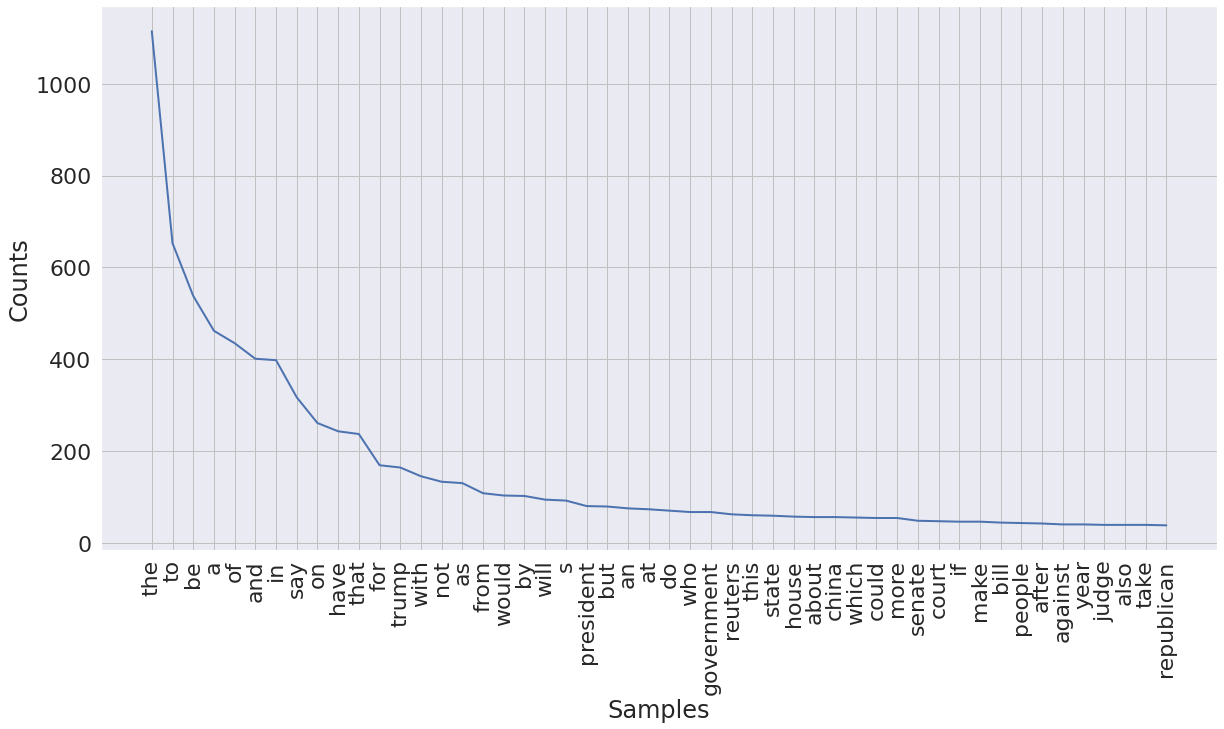

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)},font_scale=2)
freq = FreqDist(tokens)
freq.plot(50, cumulative = False)

Eliminacion de stopwords

In [ ]:
tokens2 = tokens[:]
for token in tokens:
  if nlp.vocab[token].is_stop == True:
    tokens2.remove(token)

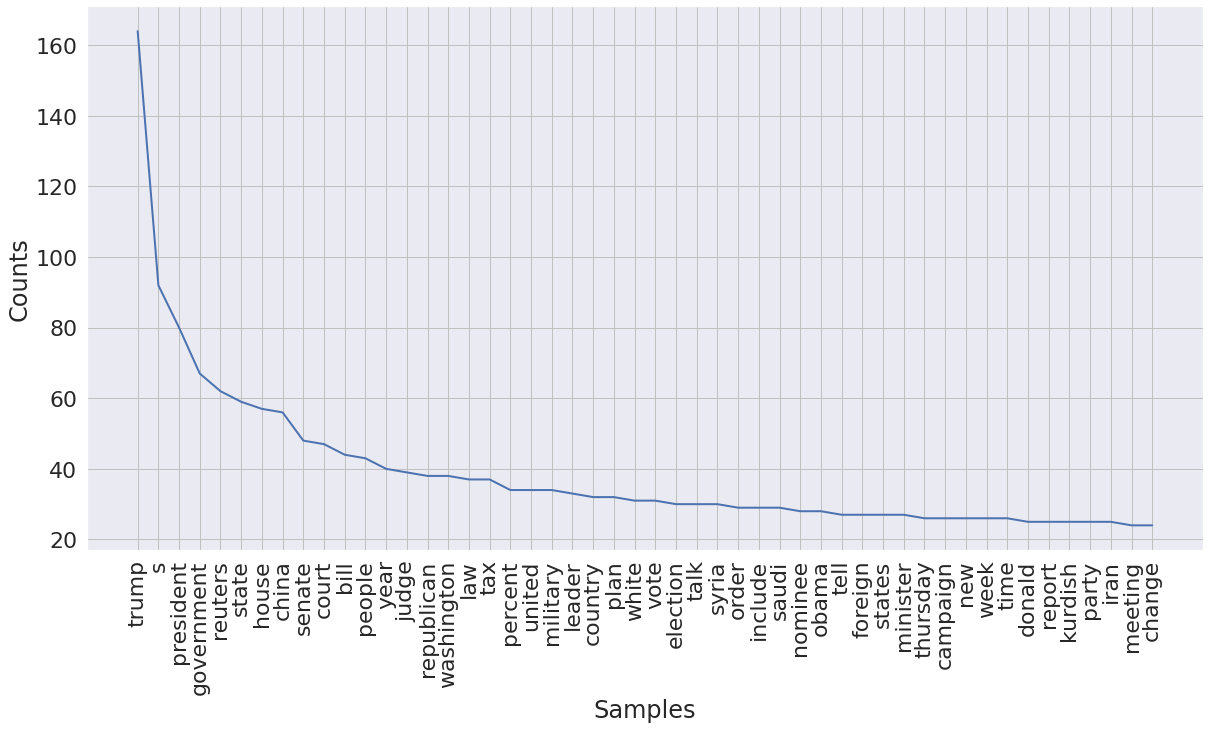

In [ ]:
freq = FreqDist(tokens2)
freq.plot(50, cumulative = False)

Eliminación de palabras consideradas irrelevantes. Aquí se eliminan palabras que pueden hacer referencia a cualquier contexto o propias de una noticia.

In [ ]:
palabras_irrelavantes = ['s','year','talk','reuters','percent','order','include','tell','week','new','time','meeting','change','need','work','force','know','ban','pass']
tokens = tokens2[:]
for token in tokens2:
  if token in palabras_irrelavantes:
    tokens.remove(token)

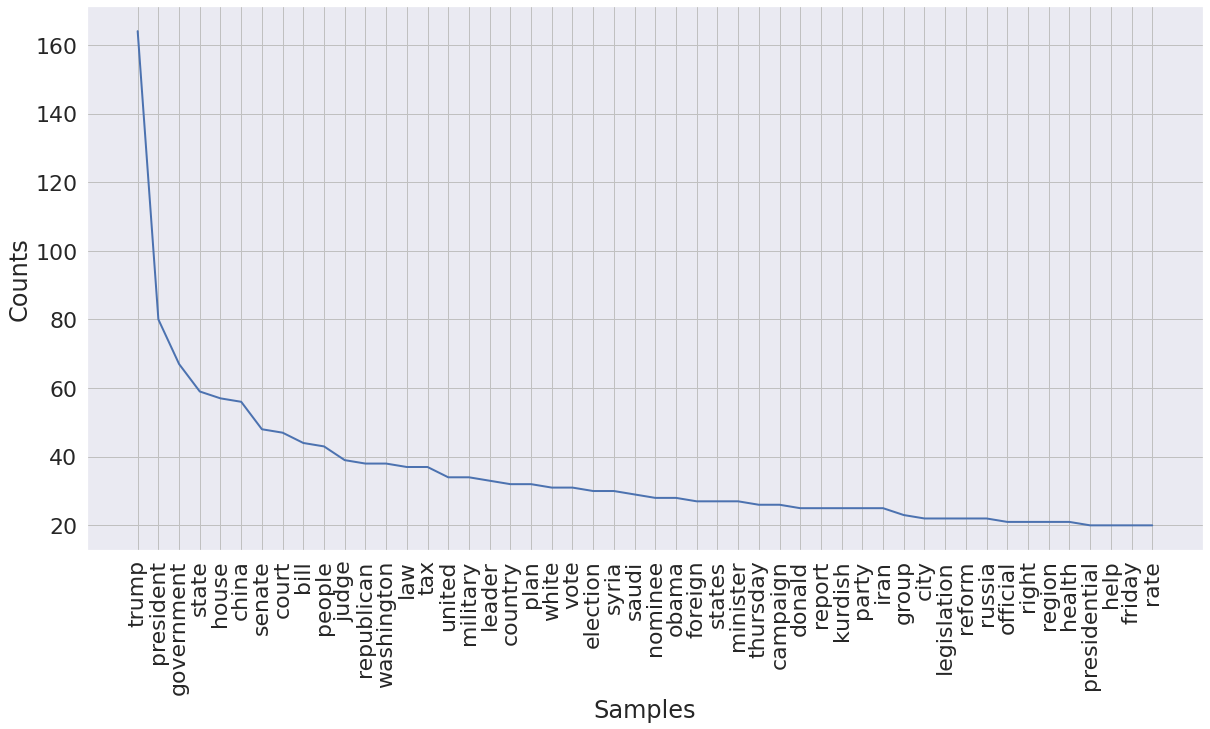

In [ ]:
freq = FreqDist(tokens)
freq.plot(50, cumulative = False)

##1.1.Clasificación manual de primeros 50 valores<a name="clas50"></a>

In [ ]:
news_data = X_train.copy()

In [ ]:
news_data["tipo"] = [ None for i in range(news_data.shape[0]) ]

In [ ]:
news_data

,title,text,tipo
9294,Trump escalates attacks on judge in Trump Univ...,(Reuters) - Republican presidential candidate ...,None
3793,Trump reassures farmers immigration crackdown ...,WASHINGTON/SAN FRANCISCO (Reuters) - President...,None
887,Goldman's Blankfein is only major financial fi...,(Reuters) - Goldman Sachs Group Inc (GS.N) Chi...,None
13292,Mattis eyes moving away from arming Syrian Kur...,ABOARD A U.S. MILITARY AIRCRAFT (Reuters) - U....,None
9155,Florida nightclub massacre prompts Rubio to re...,WASHINGTON (Reuters) - U.S. Senator Marco Rubi...,None
...,...,...,...
13157,France's Macron tells Trump concerned over Jer...,PARIS (Reuters) - French President Emmanuel Ma...,None
5484,Burlington to drop Ivanka Trump brand online: ...,(Reuters) - Burlington Stores Inc joined other...,None
4820,Trump daughter Ivanka to get West Wing office,WASHINGTON (Reuters) - President Donald Trump’...,None
18785,Foreign powers could try to influence German c...,BERLIN (Reuters) - Germany s elections escaped...,None


In [ ]:
#news_data.to_csv("news.csv")

In [ ]:
news_data.iloc[0,-1] = 0    #2
news_data.iloc[1,-1] = 1    #3
news_data.iloc[2,-1] = 0    #4
news_data.iloc[3,-1] = 0    #5
news_data.iloc[4,-1] = 1    #6
news_data.iloc[5,-1] = 0    #7
news_data.iloc[6,-1] = 1    #8
news_data.iloc[7,-1] = 0    #9
news_data.iloc[8,-1] = 1    #10
news_data.iloc[9,-1] = 1    #11
news_data.iloc[10,-1] = 0   #12
news_data.iloc[11,-1] = 1   #13
news_data.iloc[12,-1] = 1   #14
news_data.iloc[13,-1] = 1   #15
news_data.iloc[14,-1] = 1   #16
news_data.iloc[15,-1] = 0   #17
news_data.iloc[16,-1] = 0   #18

In [ ]:
news_data.iloc[17,-1] = 1   #19
news_data.iloc[18,-1] = 0   #20
news_data.iloc[19,-1] = 1   #21
news_data.iloc[20,-1] = 1   #22
news_data.iloc[21,-1] = 0   #23
news_data.iloc[22,-1] = 1   #24
news_data.iloc[23,-1] = 1   #25
news_data.iloc[24,-1] = 1   #26
news_data.iloc[25,-1] = 0   #27
news_data.iloc[26,-1] = 1   #28
news_data.iloc[27,-1] = 0   #29
news_data.iloc[28,-1] = 0   #30
news_data.iloc[29,-1] = 0   #31
news_data.iloc[30,-1] = 1   #32
news_data.iloc[31,-1] = 0   #33
news_data.iloc[32,-1] = 1   #34
news_data.iloc[33,-1] = 0   #35

In [ ]:
news_data.iloc[34,-1] = 1
news_data.iloc[35,-1] = 1
news_data.iloc[36,-1] = 1
news_data.iloc[37,-1] = 0
news_data.iloc[38,-1] = 0
news_data.iloc[39,-1] = 0
news_data.iloc[40,-1] = 0
news_data.iloc[41,-1] = 0
news_data.iloc[42,-1] = 0
news_data.iloc[43,-1] = 0
news_data.iloc[44,-1] = 0
news_data.iloc[45,-1] = 0
news_data.iloc[46,-1] = 0
news_data.iloc[47,-1] = 0
news_data.iloc[48,-1] = 1
news_data.iloc[49,-1] = 1
news_data.iloc[50,-1] = 0

In [ ]:
news_data.head(50)

,title,text,tipo
9294,Trump escalates attacks on judge in Trump Univ...,(Reuters) - Republican presidential candidate ...,0
3793,Trump reassures farmers immigration crackdown ...,WASHINGTON/SAN FRANCISCO (Reuters) - President...,1
887,Goldman's Blankfein is only major financial fi...,(Reuters) - Goldman Sachs Group Inc (GS.N) Chi...,0
13292,Mattis eyes moving away from arming Syrian Kur...,ABOARD A U.S. MILITARY AIRCRAFT (Reuters) - U....,0
9155,Florida nightclub massacre prompts Rubio to re...,WASHINGTON (Reuters) - U.S. Senator Marco Rubi...,1
11771,Factbox: May's Brexit plan passes parliamentar...,LONDON (Reuters) - Legislation underpinning th...,0
1378,"In meeting with military, Trump talks of 'calm...",WASHINGTON (Reuters) - After discussing Iran a...,1
17548,Myanmar’s Suu Kyi sets out aid plan to end Roh...,GENEVA (Reuters) - Aung San Suu Kyi has set ou...,0
394,"Lower taxes, big gains: The stocks poised to w...",NEW YORK (Reuters) - A proposal driven by Pres...,1
3519,Path cleared for Congress to consider U.S. arm...,WASHINGTON (Reuters) - U.S. Secretary of State...,1



##1.2.Lematizacion<a name="lem"></a>


Se usan las primeras 20 palabras más frecuentes en todos los textos, se verifica si se encuentran en cada texto de manera individual y se crea un booleano que nos indique esto en una nueva tabla.

In [ ]:
news_natural = pd.DataFrame();
for j in range(20):
  temp = freq.most_common()[j][0]
  news_natural[temp] = [ -1 for _ in range(150)]
  for i in range(150):
    news_natural[temp].iloc[i] = int(temp in news_data.iloc[i,0].lower() +" "+ news_data.iloc[i,1].lower())

In [ ]:
for i in range(50):
  news_natural["tipo"].iloc[i] = news_data["tipo"].iloc[i]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Se agrega la columna de clasificación con las primeros 50 valores introducidos manualmente.

In [ ]:
Tnews_natural.iloc[50:,:-1] 

,trump,president,government,state,house,china,senate,court,bill,people,judge,republican,washington,law,tax,united,military,leader,country,plan
50,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
52,1,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0
53,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0
54,0,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
146,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
147,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
148,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## 1.3.Clasificacion de los 100 datos faltantes KMeans<a name="clas100"></a>

Con KMeans usando los 50 ya clasificados para el entrenamiento.

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(news_natural.iloc[:50,:-1])

In [ ]:
predictKm = kmeans.fit_predict(news_natural.iloc[50:,:-1])

In [ ]:
predictKm

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

In [ ]:
news_natural["tipo"].iloc[50:] = predictKm

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
# news_natural.to_csv("news_natural.csv")

In [ ]:
news_natural

,trump,president,government,state,house,china,senate,court,bill,people,judge,republican,washington,law,tax,united,military,leader,country,plan,tipo
0,1,1,0,1,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0
1,1,1,1,1,1,0,1,0,1,1,0,0,1,0,0,1,0,1,1,0,1
2,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,0
4,1,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1
146,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
147,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
148,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
x2 = news_natural.iloc[:,:-1]

#2.Preprocesamiento<a name="prep"></a>

##2.1.Preprocesamiento PCA<a name="pca"></a>

In [ ]:
pca = PCA(5)
principal_Components = pca.fit_transform(x2)
data_PCA = pd.DataFrame(data = principal_Components, columns=['PCA1','PCA2','PCA3','PCA4','PCA5'])
data_PCA.shape

(150, 5)

In [ ]:
news_pca = data_PCA.copy()

In [ ]:
news_pca['tipo'] = news_natural.iloc[:,-1]

In [ ]:
news_pca

,PCA1,PCA2,PCA3,PCA4,PCA5,tipo
0,0.454245,0.064518,0.649541,1.106797,-0.458957,0
1,1.113672,0.891930,-0.256521,-1.163685,-0.467093,1
2,0.013801,-0.989274,0.012645,-0.642684,-0.304205,0
3,0.366429,0.801332,-0.547990,0.991899,0.046450,0
4,1.290715,0.108903,0.069739,0.232634,-0.798948,1
...,...,...,...,...,...,...
145,-0.099485,0.236579,-0.436978,1.170999,0.163266,1
146,-0.495026,-1.109102,-0.139368,0.319940,-0.514959,1
147,0.414683,-0.411933,0.482121,-0.203088,-0.084366,1
148,-1.220125,0.446684,-0.428696,-0.118329,0.257333,0


## 2.2.Split<a name="split"></a>

In [ ]:
x_ = news_pca.iloc[:,:-1]
y_ = news_pca.iloc[:,-1].astype(int)
x_train, x_test, y_train, y_test = train_test_split(x_,y_, test_size=0.30)

In [ ]:
def leer_modelos_cv(n,ruta_modelo,ruta_cv):
  cv_drive = []
  modelos_drive = []
  for i in range(n):
    modelos_drive += [pickle.load(open(ruta_modelo.format(i), 'rb'))]
    with open(ruta_cv.format(i), "rb") as fp:
      cv_drive += [pickle.load(fp)]
  return modelos_drive,cv_drive

In [ ]:
def mejor_modelo(modelos,list_cv,x_test,y_test):
  temp = []
  for i in range(len(modelos)):
    temp += [[modelos[i], np.mean(list_cv[i])] ]
  lista_modelos = sorted(temp,key=lambda x: x[1])
  return lista_modelos[-1]

In [ ]:
def data_boxplot(modelos,list_cv):
  temp = []
  for i in range(len(modelos)):
    temp += [np.mean(list_cv[i])]
  return temp

# 3.Redes neuronales<a name="redes"></a>

In [ ]:
activation = ['identity', 'logistic', 'tanh', 'relu']
solver = ['lbfgs', 'sgd', 'adam']

In [ ]:
def redes_neuronales_hiperparametros(layer, max_iter,learning_rate, activation, alpha,solver,x_tr,x_te,y_tr,y_te):
  red_neuronal =  MLPClassifier(solver = solver,hidden_layer_sizes=layer, max_iter=max_iter, learning_rate_init=learning_rate, activation=activation, alpha=alpha,verbose= False)
  red_neuronal.fit(x_tr, y_tr)
  prediccionesMLP = red_neuronal.predict(x_te)
  cv_resultado = cross_val_score(red_neuronal, x_tr, y_tr, cv=10, scoring='f1_macro')
  f1 = np.mean(cv_resultado)
  print(activation,solver)
  print(accuracy_score(y_te, prediccionesMLP))
  print(confusion_matrix(y_te, prediccionesMLP))
  print(classification_report(y_te, prediccionesMLP))
  print("cross validation f1: ", f1)
  return red_neuronal, cv_resultado

##3.1.Resultados<a name="redesRes"></a>

In [ ]:
modelos_redes = []
for i in range(len(activation)):
  for j in range(len(solver)):
    modelos_redes += [redes_neuronales_hiperparametros( (8,(i+j+1)), 10**(i+1), 1/(10**(i+1)), activation[i], 1e-5 * (10**(i+1)) ,solver[j],x_train,x_test,y_train,y_test)]

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

identity lbfgs
0.9555555555555556
[[18  2]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.93      1.00      0.96        25

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

cross validation f1:  0.8915248640248642
identity sgd
0.8888888888888888
[[17  3]
 [ 2 23]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.88      0.92      0.90        25

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45

cross validation f1:  0.8523756798756799


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

identity adam
0.9333333333333333
[[17  3]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.89      1.00      0.94        25

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

cross validation f1:  0.8348601398601397


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

logistic lbfgs
0.9555555555555556
[[18  2]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.93      1.00      0.96        25

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

cross validation f1:  0.8523329448329449
logistic sgd
0.5555555555555556
[[ 0 20]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.56      1.00      0.71        25

    accuracy                           0.56        45
   macro avg       0.28      0.50      0.36        45
weighted avg       0.31      0.56      0.40        45

cross validation f1:  0.34730392156862744


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization 

logistic adam
0.8888888888888888
[[15  5]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        20
           1       0.83      1.00      0.91        25

    accuracy                           0.89        45
   macro avg       0.92      0.88      0.88        45
weighted avg       0.91      0.89      0.89        45

cross validation f1:  0.8399561549561548
tanh lbfgs
0.9111111111111111
[[18  2]
 [ 2 23]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.92      0.92      0.92        25

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45

cross validation f1:  0.8440326340326341


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


tanh sgd
0.9555555555555556
[[18  2]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.93      1.00      0.96        25

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

cross validation f1:  0.8910275835275836


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


tanh adam
0.9555555555555556
[[18  2]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.93      1.00      0.96        25

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

cross validation f1:  0.8329662004662005
relu lbfgs
0.9333333333333333
[[18  2]
 [ 1 24]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.92      0.96      0.94        25

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

cross validation f1:  0.82492784992785
relu sgd
0.4444444444444444
[[20  0]
 [25  0]]
              precision    recall  f1-score   support

           0       0.44      1.00      0.62        20
           1 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


relu adam
0.4444444444444444
[[20  0]
 [25  0]]
              precision    recall  f1-score   support

           0       0.44      1.00      0.62        20
           1       0.00      0.00      0.00        25

    accuracy                           0.44        45
   macro avg       0.22      0.50      0.31        45
weighted avg       0.20      0.44      0.27        45

cross validation f1:  0.6701563714063713


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Guardar modelos
for i in range(len(modelos_redes)):
    pickle.dump(modelos_redes[i][0], open('/content/drive/My Drive/modelos final/modelos_redes/modelos_redes{}'.format(i), 'wb'))

In [ ]:
# Guardar cross validation
for i in range(len(modelos_redes)):
  with open("/content/drive/My Drive/modelos final/cv_redes/cv_redes{}.txt".format(i), "wb") as fp:
    pickle.dump(modelos_redes[i][1], fp)

In [ ]:
# recuperamos los modelos guardados
ruta_modelos = '/content/drive/My Drive/modelos final/modelos_redes/modelos_redes{}' 
ruta_cv = '/content/drive/My Drive/modelos final/cv_redes/cv_redes{}.txt'
redes,cv_redes  = leer_modelos_cv(12,ruta_modelos,ruta_cv)

##3.2.Mejor Resultado<a name="redesRoc"></a>

In [ ]:
mejor_redes = mejor_modelo(redes,cv_redes,X_test,Y_test)
mejor_redes[0].get_params()

{'activation': 'identity',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (8, 1),
 'learning_rate': 'constant',
 'learning_rate_init': 0.1,
 'max_fun': 15000,
 'max_iter': 10,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
print(accuracy_score(y_test, mejor_redes[0].predict(x_test) ))
print(confusion_matrix(y_test, mejor_redes[0].predict(x_test) ))
print(classification_report(y_test, mejor_redes[0].predict(x_test)) )
print("cross validation f1: ", mejor_redes[1])

0.9555555555555556
[[18  2]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.93      1.00      0.96        25

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

cross validation f1:  0.8915248640248642


# 4.Redes Bayesianas<a name="bayes"></a>


In [ ]:
def redes_bayesianas_hiperparametros(n_clases,suavizado,x_tr,x_te,y_tr,y_te):
  modelo = GaussianNB(priors= n_clases, var_smoothing= suavizado)
  modelo.fit(x_tr,y_tr)
  prediciones = modelo.predict(x_te)
  cv_resultado = cross_val_score(modelo,x_tr, y_tr, cv=10, scoring='f1_macro')
  f1 = np.mean(cv_resultado)
  print(accuracy_score(y_te, prediciones))
  print(confusion_matrix(y_te, prediciones))
  print(classification_report(y_te, prediciones))
  print("cross validation f1: ", f1)
  return modelo, cv_resultado

##4.1.Resultados<a name="bayesRes"></a>

In [ ]:
modelos_bayes = []
priors = [ [ round(0.05*i,2), round(1.0-(0.05*i),2)] for i in range(20)]
for i in range(len(priors)):
  modelos_bayes +=[redes_bayesianas_hiperparametros(priors[i],1e-9*(10*i),x_train,x_test,y_train,y_test)]

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:449: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:449: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:449: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:449: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:449: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:449: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes

0.5555555555555556
[[ 0 20]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.56      1.00      0.71        25

    accuracy                           0.56        45
   macro avg       0.28      0.50      0.36        45
weighted avg       0.31      0.56      0.40        45

cross validation f1:  0.34730392156862744
0.6666666666666666
[[ 5 15]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      0.25      0.40        20
           1       0.62      1.00      0.77        25

    accuracy                           0.67        45
   macro avg       0.81      0.62      0.58        45
weighted avg       0.79      0.67      0.61        45

cross validation f1:  0.4934556130144364
0.7777777777777778
[[10 10]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        20
           1       0.71      1.00      0

In [ ]:
# Guardar modelos
for i in range(len(modelos_bayes)):
  pickle.dump(modelos_bayes[i][0], open('/content/drive/My Drive/modelos final/modelos_bayes/modelos_bayes'+str(i), 'wb'))

In [ ]:
# Guardar cross validation
for i in range(len(modelos_bayes)):
  with open("/content/drive/My Drive/modelos final/cv_bayes/cv_bayes{}.txt".format(i), "wb") as fp:
    pickle.dump(modelos_bayes[i][1], fp)

In [ ]:
ruta_modelos = '/content/drive/My Drive/modelos final/modelos_bayes/modelos_bayes{}' 
ruta_cv = '/content/drive/My Drive/modelos final/cv_bayes/cv_bayes{}.txt'
bayes,cv_bayes  = leer_modelos_cv(20,ruta_modelos,ruta_cv)

##4.2.Mejor Resultado<a name="bayesRoc"></a>

In [ ]:
mejor_bayes = mejor_modelo(bayes,cv_bayes,X_test,Y_test)
mejor_bayes[0].get_params()

{'priors': [0.7, 0.3], 'var_smoothing': 1.4e-07}

In [ ]:
print(accuracy_score(y_test, mejor_bayes[0].predict(x_test) ))
print(confusion_matrix(y_test, mejor_bayes[0].predict(x_test) ))
print(classification_report(y_test, mejor_bayes[0].predict(x_test)) )
print("cross validation f1: ", mejor_bayes[1])

0.8888888888888888
[[18  2]
 [ 3 22]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.92      0.88      0.90        25

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45

cross validation f1:  0.852979797979798


# 5.Random Forest<a name="for"></a>

In [ ]:
def random_forest_hiperparametros(n, depth, state, class_weight, x_tr, x_te, y_tr, y_te):
  randomf_clf = RandomForestClassifier(n_estimators=n,max_depth=depth,random_state=state,
                                  verbose=0,class_weight=class_weight)
  randomf_clf.fit(x_tr,y_tr)
  prediccionesRF = randomf_clf.predict(x_te)
  cv_resultado = cross_val_score(randomf_clf, x_tr, y_tr, cv=10, scoring='f1_macro')
  f1 = np.mean(cv_resultado)
  print(accuracy_score(y_te, prediccionesRF))
  print(confusion_matrix(y_te, prediccionesRF))
  print(classification_report(y_te, prediccionesRF))
  print("cross validation f1: ", f1)
  return randomf_clf, cv_resultado

In [ ]:
class_weight = ['balanced', 'balanced_subsample']

##5.1.Resultados<a name="forRes"></a>

In [ ]:
modelos_randomF = []
for key in class_weight:
  for i in range(10):
    modelos_randomF +=[random_forest_hiperparametros(30+10*i,(i+8)*2,randint(0,80),key, x_train,x_test,y_train,y_test)]

0.9111111111111111
[[17  3]
 [ 1 24]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.89      0.96      0.92        25

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45

cross validation f1:  0.8332264957264958
0.9111111111111111
[[17  3]
 [ 1 24]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.89      0.96      0.92        25

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45

cross validation f1:  0.841388888888889
0.9333333333333333
[[17  3]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.89      1.00      0.9

In [ ]:
# Guardar modelos
for i in range(len(modelos_randomF)):
    pickle.dump(modelos_randomF[i][0], open('/content/drive/My Drive/modelos final/modelos_randomF/modelos_randomF{}'.format(i), 'wb'))

In [ ]:
# Guardar cross validation
for i in range(len(modelos_randomF)):
  with open("/content/drive/My Drive/modelos final/cv_radnomF/cv_radnomF{}.txt".format(i), "wb") as fp:
    pickle.dump(modelos_randomF[i][1], fp)

In [ ]:
ruta_modelos = '/content/drive/My Drive/modelos final/modelos_randomF/modelos_randomF{}' 
ruta_cv = '/content/drive/My Drive/modelos final/cv_radnomF/cv_radnomF{}.txt'
randomF, cv_randomF  = leer_modelos_cv(20,ruta_modelos,ruta_cv)

##5.2.Mejor Resultado<a name="for"></a>

In [ ]:
mejor_randomF = mejor_modelo(randomF,cv_randomF,x_test,y_test)
mejor_randomF[0].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 78,
 'verbose': 0,
 'warm_start': False}

In [ ]:
mejor_randomF[1]

0.8820454545454546

In [ ]:
print(accuracy_score(y_test, mejor_randomF[0].predict(x_test) ))
print(confusion_matrix(y_test, mejor_randomF[0].predict(x_test) ))
print(classification_report(y_test, mejor_randomF[0].predict(x_test)) )
print("cross validation f1: ", mejor_randomF[1])

0.9333333333333333
[[17  3]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.89      1.00      0.94        25

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

cross validation f1:  0.8820454545454546


# 6.Adaboost<a name="ada"></a>

In [ ]:
def ada_hiperparametros(n,learning,algorithm,random,x_tr,x_te,y_tr,y_te):
  ada_clf = AdaBoostClassifier(
      n_estimators = n,
      learning_rate= learning,
      random_state= random,
      algorithm=algorithm,)
  ada_clf.fit(x_tr,y_tr)
  prediccionesRF = ada_clf.predict(x_te)
  f1 = np.mean(cv_resultado)
  cv_resultado = cross_val_score(ada_clf, x_tr, y_tr, cv=10, scoring='f1_macro')
  print(accuracy_score(y_te, prediccionesRF))
  print(confusion_matrix(y_te, prediccionesRF))
  print(classification_report(y_te, prediccionesRF))
  print("cross validation f1: ", f1)
  return ada_clf, cv_resultado

##6.1.Resultados<a name="adaRes"></a>

In [ ]:
algorithm = ['SAMME','SAMME.R']
modelos_adaB = []
for i in range(len(algorithm)):
  for j in range(1,10):
    modelos_adaB +=[ada_hiperparametros(50*j,1/(10*(j)),algorithm[i],randint(0,80),x_train,x_test,y_train,y_test )]

0.8888888888888888
[[16  4]
 [ 1 24]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.86      0.96      0.91        25

    accuracy                           0.89        45
   macro avg       0.90      0.88      0.89        45
weighted avg       0.89      0.89      0.89        45

cross validation f1:  0.8139335664335665
0.8888888888888888
[[16  4]
 [ 1 24]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.86      0.96      0.91        25

    accuracy                           0.89        45
   macro avg       0.90      0.88      0.89        45
weighted avg       0.89      0.89      0.89        45

cross validation f1:  0.8139335664335665
0.8888888888888888
[[16  4]
 [ 1 24]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.86      0.96      0.

In [ ]:
# Guardar modelos
for i in range(len(modelos_adaB)):
  pickle.dump(modelos_adaB[i][0], open('/content/drive/My Drive/modelos final/modelos_adaB/modelos_adaB'+str(i), 'wb'))

In [ ]:
# Guardar cross validation
for i in range(len(modelos_adaB)):
  with open("/content/drive/My Drive/modelos final/cv_adaB/cv_adaB{}.txt".format(i), "wb") as fp:
    pickle.dump(modelos_adaB[i][1], fp)

In [ ]:
# recuperamos los modelos guardados
ruta_modelos = '/content/drive/My Drive/modelos final/modelos_adaB/modelos_adaB{}' 
ruta_cv = '/content/drive/My Drive/modelos final/cv_adaB/cv_adaB{}.txt'
adaB,cv_adaB  = leer_modelos_cv(18,ruta_modelos,ruta_cv)

##6.2.Mejor Resultado<a name="adaRoc"></a>

In [ ]:
mejor_adaB = mejor_modelo(adaB,cv_adaB,x_test,y_test)

In [ ]:
mejor_adaB[0].get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 0.011111111111111112,
 'n_estimators': 450,
 'random_state': 50}

In [ ]:
mejor_adaB[1]

0.8352447552447553

In [ ]:
print(accuracy_score(y_test, mejor_adaB[0].predict(x_test) ))
print(confusion_matrix(y_test, mejor_adaB[0].predict(x_test) ))
print(classification_report(y_test, mejor_adaB[0].predict(x_test)) )
print("cross validation f1: ", mejor_adaB[1])

0.9111111111111111
[[16  4]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.86      1.00      0.93        25

    accuracy                           0.91        45
   macro avg       0.93      0.90      0.91        45
weighted avg       0.92      0.91      0.91        45

cross validation f1:  0.8352447552447553


# 7.Hist gradient<a name="hist"></a>

In [ ]:
def hist_hiperparametros(loss,learning,n_inter,depth,x_tr,x_te,y_tr,y_te):

  hist_clf = HistGradientBoostingClassifier(loss = loss,learning_rate= learning,max_iter = n_inter,max_depth = depth, verbose = False )
  hist_clf.fit(x_tr,y_tr)
  predicciones = hist_clf.predict(x_te)
  cv_resultado = cross_val_score(hist_clf, x_tr, y_tr, cv=10, scoring='f1_macro')
  f1 = np.mean(cv_resultado)
  print(accuracy_score(y_te, predicciones))
  print(confusion_matrix(y_te, predicciones))
  print(classification_report(y_te, predicciones))
  print("cross validation f1: ", f1)
  return hist_clf, cv_resultado

##7.1.Resultados<a name="histRes"></a>

In [ ]:
loss = ['auto', 'binary_crossentropy']
modelos_hist = []
for i in range(len(loss)):
  for j in range(10):
    modelos_hist += [hist_hiperparametros(loss[i], 0.1*(i+j+1), 100*(i+j+1), (i+j+8)*2,x_train,x_test,y_train,y_test)]

0.9555555555555556
[[18  2]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.93      1.00      0.96        25

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

cross validation f1:  0.8645454545454546
0.9555555555555556
[[18  2]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.93      1.00      0.96        25

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

cross validation f1:  0.8655730380730381
0.9333333333333333
[[18  2]
 [ 1 24]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.92      0.96      0.

In [ ]:
# Guardar modelos
for i in range(len(modelos_hist)):
  pickle.dump(modelos_hist[i][0], open('/content/drive/My Drive/modelos final/modelos_hist/modelos_hist'+str(i), 'wb'))

In [ ]:
# Guardar cross validation
for i in range(len(modelos_hist)):
  with open("/content/drive/My Drive/modelos final/cv_hist/cv_hist{}.txt".format(i), "wb") as fp:
    pickle.dump(modelos_hist[i][1], fp)

In [ ]:
# recuperamos los modelos guardados
ruta_modelos = '/content/drive/My Drive/modelos final/modelos_hist/modelos_hist{}' 
ruta_cv = '/content/drive/My Drive/modelos final/cv_hist/cv_hist{}.txt'
hist,cv_hist  = leer_modelos_cv(20,ruta_modelos,ruta_cv)

In [ ]:
mejor_hist = mejor_modelo(hist,cv_hist,x_test,y_test)

##7.2.Mejor Resultado<a name="histRoc"></a>

In [ ]:
mejor_hist[0].get_params()

{'l2_regularization': 0.0,
 'learning_rate': 0.2,
 'loss': 'binary_crossentropy',
 'max_bins': 255,
 'max_depth': 18,
 'max_iter': 200,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 20,
 'n_iter_no_change': None,
 'random_state': None,
 'scoring': None,
 'tol': 1e-07,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
mejor_hist[1]

0.8655730380730381

In [ ]:
print(accuracy_score(y_test, mejor_hist[0].predict(x_test) ))
print(confusion_matrix(y_test, mejor_hist[0].predict(x_test) ))
print(classification_report(y_test, mejor_hist[0].predict(x_test)) )
print("cross validation f1: ", mejor_hist[1])

0.9555555555555556
[[18  2]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.93      1.00      0.96        25

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

cross validation f1:  0.8655730380730381


#8.Conclusiones <a name="concl"></a>

En conclusion, el procesamiento de lenguaje natural requiere de una reinterpretacion y transformacion de los textos usados, como por ejemplo la lematizacion que clasifica los textos segun ciertas palabras que este contenga. Luego, con esta informacion pueden entrenarse modelos de machine learning, con un previo preprocesamiento si lo requiere, para la identificacion de los mismo. Ademas, si se poseen textos sin clasificacion existen tecnicas para crear grupos como lo pude ser KMeans que a partir de algunos pocos textos clasificados puede encargarse de la clasificacion del resto.

Segun el grafico boxplot podemos afirmar que al algoritmo que menos variacion de su medida f1 le provoca el cambio de hyperparametros es AdaBost, mientras que al que mas le afectan son redes bayesianas. El modelo que presento un mayor promedio en sus medidas f1 resultantes fue random forest. Por ultimo, a pesar de tener un variacion muy grande al cambiar sus hyperparametros, el mejor resultado fue obtenido por las redes neuronales con un 89.15248640248642%, por ello podemos afiermar que nunca se puede asegurar que se posee el resultado, si es que no se prueba con el los hiperparametros de los modelos usado. Los hyperparametros con los que surgio el mejor resultado fueron:

activation': identity,

alpha : 0.0001,

batch_size: auto,

beta_1: 0.9,

beta_2: 0.999,

early_stopping: False,

epsilon: 1e-08,

hidden_layer_sizes: (8, 1),

learning_rate: constant,

learning_rate_init: 0.1,

max_fun: 15000,

max_iter: 10,

momentum: 0.9,

n_iter_no_change: 10,

nesterovs_momentum: True,

power_t: 0.5,

random_state: None,

shuffle: True,

solver: lbfgs,

tol: 0.0001,

validation_fraction: 0.1,

verbose: False,

warm_start: False


In [ ]:
redes_bp = data_boxplot(redes,cv_redes)
bayes_bp = data_boxplot(bayes,cv_bayes)
rand_bp = data_boxplot(randomF, cv_randomF)
ada_bp = data_boxplot(adaB,cv_adaB)
hist_bp = data_boxplot(hist,cv_hist)
results=[redes_bp,bayes_bp,rand_bp,ada_bp,hist_bp]
names = ['MLP', 'NB', 'RF', 'AB', 'HBG']

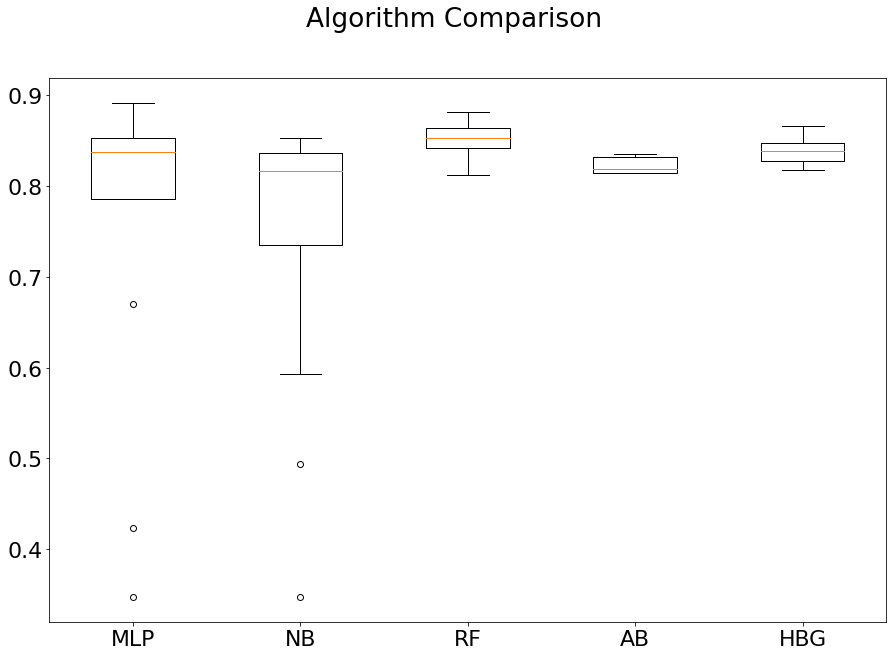

In [ ]:
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)

plt.boxplot(results)

ax.set_xticklabels(names)
plt.show()